In [2]:
#Import the needed dependincies
import os
from PIL import Image

import matplotlib.pyplot as plt
import shutil
import numpy as np
import cv2
from skimage import io, exposure
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dropout, Dense
import tensorflow as tf
from keras.models import save_model
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.applications  import DenseNet121
from tensorflow.keras import layers
np.random.seed(1)
tf.random.set_seed(1)

In [16]:
#rename the files to be filename_subdir
import os
'''
# set the path of the main folder
folder_path = "Downloads/id_digits"

# iterate through all subdirectories
for subdir_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subdir_name)
    if os.path.isdir(subfolder_path):
        
        # iterate through all image files in the subdirectory
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.JPG') or filename.endswith('.png')or filename.endswith('.jpeg')or filename.endswith('.jpg'):
                
                # construct the new filename with the subdirectory name
                new_filename = f"{os.path.splitext(filename)[0]}_{subdir_name}{os.path.splitext(filename)[1]}"
                
                # rename the file
                old_file_path = os.path.join(subfolder_path, filename)
                new_file_path = os.path.join(subfolder_path, new_filename)
                os.rename(old_file_path, new_file_path)
'''

In [17]:
#create new dir to have all the data
path='Downloads/Dataset2'
# Create the directory
os.makedirs(path, exist_ok=True)


In [18]:

import os

# set the path of the folder
folder_path = "Downloads/id_digits"

# get a list of all the files and directories in the folder
contents = os.listdir(folder_path)

# iterate through the contents and find all the subdirectories
subdirectories = []
for item in contents:
    item_path = os.path.join(folder_path, item)
    if os.path.isdir(item_path):
        subdirectories.append(item_path)


In [21]:
#move all images from folder_path to path
for current_dir in subdirectories:
    for filename in os.listdir(current_dir):
      if filename.endswith('.jpeg'):
          old_path = os.path.join(current_dir, filename)
          new_path = os.path.join(path, filename)
          shutil.move(old_path, new_path)

In [30]:
#Labeling our images
dir_path = path
file_names = os.listdir(dir_path)
label_dict = {}
for file_name in file_names:
    if file_name.endswith('.png')or file_name.endswith('.JPG')or file_name.endswith('.jpeg') or file_name.endswith('.jpg') :
        s=file_name.split('.')[0]
        label=s.split('_')[1]
        label_dict[file_name] = label

In [31]:
file_names

['68 copy_5.jpeg',
 '42_4.jpeg',
 '11 copy_9.jpeg',
 '51_0.jpeg',
 '36_7.jpeg',
 '9 copy_4.jpeg',
 '46_3.jpeg',
 '14_1.jpeg',
 '57_4.JPG',
 '55_7.jpeg',
 '69_1.jpeg',
 '32_0.jpeg',
 '50_4.jpeg',
 '43_0.jpeg',
 '11_2.jpeg',
 '18_1.jpeg',
 '37_3.jpeg',
 '65_1.jpeg',
 '54_3.jpeg',
 '47_7.jpeg',
 '20_0.jpeg',
 '72_2.jpeg',
 '29_3.jpeg',
 '57 copy_6.JPG',
 '71 copy_4.jpeg',
 '68_5.jpeg',
 '27_2.jpeg',
 '60 copy_7.JPG',
 '34_6.jpeg',
 '53 copy_9.jpeg',
 '57 copy_7.JPG',
 '53_1.jpeg',
 '13 copy_5.png',
 '12_7.jpeg',
 '40_5.jpeg',
 '39_2.jpeg',
 '23 copy_9.jpeg',
 '30_1.jpeg',
 '44_2.jpeg',
 '16_0.jpeg',
 '35_2.jpeg',
 '67_0.jpeg',
 '49 copy_3.jpeg',
 '26_6.jpeg',
 '41_1.jpeg',
 '48_2.jpeg',
 '43 copy_4.jpeg',
 '52_5.jpeg',
 '39 copy_3.jpeg',
 '22_1.jpeg',
 '17_4.jpeg',
 '45_6.jpeg',
 '56_2.jpeg',
 '16 copy_6.jpeg',
 '42_8.jpeg',
 '2_4.jpeg',
 '21 copy_7.jpeg',
 '57_7.JPG',
 '18 copy_9.jpeg',
 '46 copy_9.jpeg',
 '50_8.jpeg',
 '72 copy_3.jpeg',
 '68_9.jpeg',
 '13 copy_7.png',
 '36 copy_9.jpeg',

In [58]:
img_size = (28, 28)
images = []
labels = []

for file_name in file_names:
    if file_name.endswith('.png')or file_name.endswith('.JPG')or file_name.endswith('.jpeg') or file_name.endswith('.jpg') :
        file_path = os.path.join(dir_path, file_name)
        image = Image.open(file_path)
        image=image.convert('L')
        image = image.resize(img_size, Image.ANTIALIAS)
        image = np.array(image)
        images.append(image)
        #listing our labels
        labels.append(label_dict[file_name])

In [59]:
#convert images and labels lists to np.array
images = np.array(images)
labels = np.array(labels)
     

In [60]:
len(images)

709

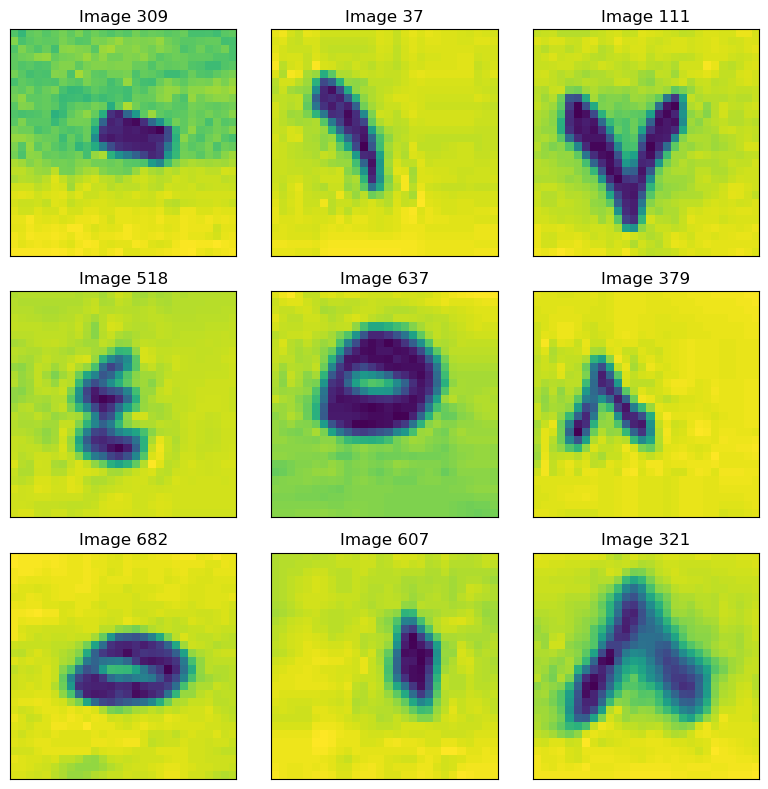

Image 309 Label 0
Image 37 Label 1
Image 111 Label 7
Image 518 Label 4
Image 637 Label 5
Image 379 Label 8
Image 682 Label 5
Image 607 Label 0
Image 321 Label 8


In [61]:

#take random 9 images indices from our dataset
indices = np.random.choice(range(len(images)), replace=False, size=9)
selected_images = images[indices]
#plot the 9 images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i])
    ax.set_title(f"Image {indices[i]}")

plt.tight_layout()
plt.show()
#Print the labels of the images sample
for i in indices:
  print('Image',i ,'Label',labels[i])

In [149]:

#Image Normalization
Normalized_Images=[]
for img in images :
# Normalize the pixel valuesfrom the range[0,255] to the range [0, 1] using min-max scaling
    img_binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    normalized_img=img_binary/255.0
    Normalized_Images.append(normalized_img)
Normalized_Images=np.array(Normalized_Images)

In [118]:
'''# Image Binarization 
Binarized_Images=[]
for img in Normalized_Images:
  # Binarize the image using a threshold value of 100
  threshold_value = 0.5
  max_value = 1
  binarized_img = np.where(img < threshold_value, 0, max_value)
  Binarized_Images.append(binarized_img)
#Convert to np.array
Binarized_Images=np.array(Binarized_Images)'''

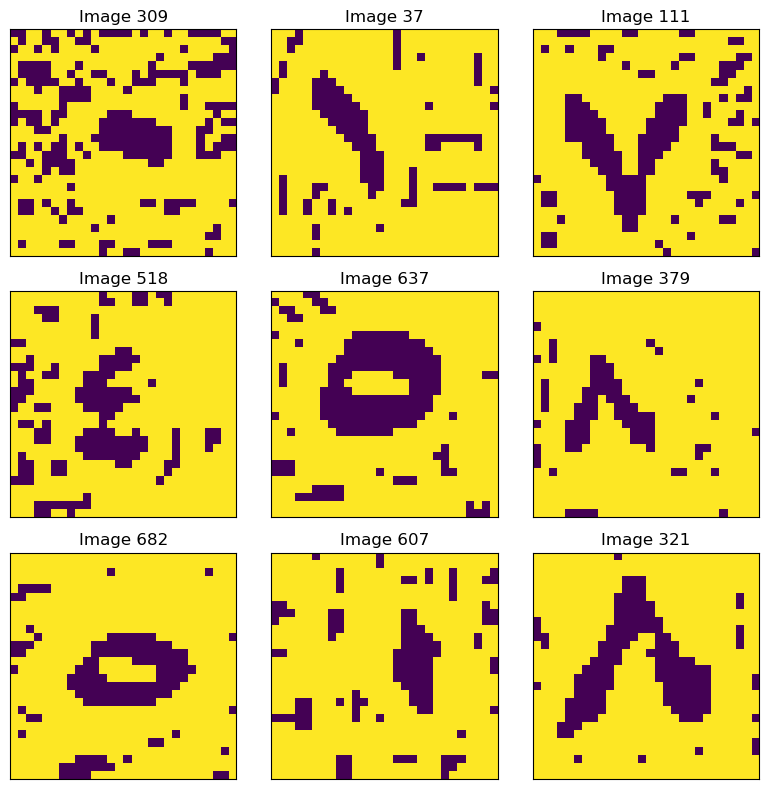

Image 309 Label 0
Image 37 Label 1
Image 111 Label 7
Image 518 Label 4
Image 637 Label 5
Image 379 Label 8
Image 682 Label 5
Image 607 Label 0
Image 321 Label 8


In [150]:
#View Random sample of our dataset after preprocessing 
selected_imgs=Normalized_Images[indices]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_imgs[i])
    ax.set_title(f"Image {indices[i]}")

plt.tight_layout()
plt.show()
#Print the correct labels for the images of the sample
for i in indices:
  print('Image',i ,'Label',labels[i])

In [191]:
train_images, test_images, train_labels, test_labels = train_test_split(Normalized_Images, labels, test_size=0.2, random_state=42)


In [192]:

#reshape train and test sets 
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1) /1.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) /1.0

In [193]:
#Create the CNN Model

model = Sequential()
model.add(Conv2D(32, (3, 3),strides=(1, 1), padding='same',activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [194]:
model.summary()                                                                 # Then we display our model's summary.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 64)         

In [198]:

#convert labels to categorical to fit to train the model
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [199]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [200]:

# Train the model
model.fit(train_images, train_labels, epochs=50)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/50
18/18 [==============================] - 0s 24ms/step - loss: 2.3331 - accuracy: 0.1093
Epoch 2/50
18/18 [==============================] - 0s 24ms/step - loss: 2.3021 - accuracy: 0.0952
Epoch 3/50
18/18 [==============================] - 0s 24ms/step - loss: 2.2891 - accuracy: 0.1041
Epoch 4/50
18/18 [==============================] - 0s 24ms/step - loss: 2.2845 - accuracy: 0.1340
Epoch 5/50
18/18 [==============================] - 0s 24ms/step - loss: 2.2583 - accuracy: 0.1552
Epoch 6/50
18/18 [==============================] - 0s 23ms/step - loss: 2.1535 - accuracy: 0.2152
Epoch 7/50
18/18 [==============================] - 0s 24ms/step - loss: 1.8503 - accuracy: 0.3563
Epoch 8/50
18/18 [==============================] - 0s 24ms/step - loss: 1.4682 - accuracy: 0.4921
Epoch 9/50
18/18 [==============================] - 0s 25ms/step - loss: 1.2394 - accuracy: 0.5538
Epoch 10/50
18/18 [==============================] - 0s 27ms/step - loss: 1.0402 - accuracy: 0.6314
Epoch 11/

In [175]:
save_model(model,'narabic.h5')


In [201]:
y_pred = model.predict(test_images)
print(classification_report(np.argmax(test_labels,axis=1),np.argmax(y_pred,axis=1)))

5/5 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.93      1.00      0.97        14
           2       0.90      1.00      0.95         9
           3       1.00      0.94      0.97        16
           4       0.94      1.00      0.97        15
           5       1.00      0.91      0.95        11
           6       1.00      0.92      0.96        12
           7       1.00      0.95      0.97        20
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        18

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



In [202]:
import numpy as np

# Convert multiple one-hot encoded labels to integers
train_integer_labels = np.argmax(train_labels, axis=1)
test_integer_labels = np.argmax(test_labels, axis=1)

In [214]:
test_integer_labels[101]

6

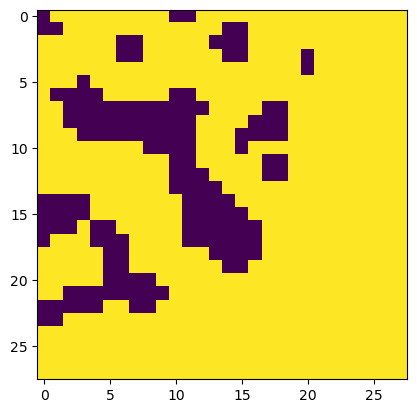

In [215]:
plt.imshow(test_images[101])

In [216]:
img=test_images[101]
pred=model.predict(np.expand_dims(img, axis=0),verbose=0)
val=(np.argmax(pred,axis=1)[0])

In [217]:
print('الحرف المتوقع :', val)

الحرف المتوقع : 6


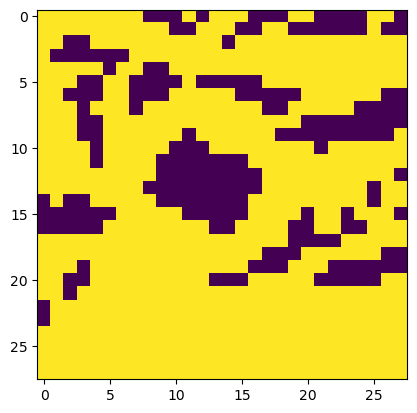

In [227]:
im='Downloads/front.jpeg'
image = Image.open(im)
image=image.convert('L')
image = image.resize(img_size, Image.ANTIALIAS)
img = np.array(image)
img_binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
ima=img_binary/255.0
plt.imshow(ima)

In [228]:
img=ima
pred=model.predict(np.expand_dims(img, axis=0),verbose=0)
val=(np.argmax(pred,axis=1)[0])

In [229]:
val

0